## Data Manipulation

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("earthquake_dataset.xlsx")
df.head()

,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map
0,2024-06-23,04:51:49,"Mindanao, Philippine",4.8,342,8.01N,125.20E,A,-
1,2024-06-23,03:58:03,Near Coast of Venezuela,5.9,105,10.80N,62.65W,A,-
2,2024-06-23,03:12:08,"Near East Coast of Honshu, japan",5.0,55,37.16N,141.09E,A,-
3,2024-06-22,20:46:51,Near Coast of Peru,5.3,64,15.79S,74.47W,A,-
4,2024-06-22,18:08:44,Afghanistan-Tajikistan Border Region,3.8,179,36.36N,71.45E,M,-


In [4]:
df.dtypes

Date          datetime64[ns]
Time (utc)            object
Region                object
Magnitude            float64
Depth (km)             int64
Latitude              object
Longitude             object
Mode                  object
Map                   object
dtype: object

In [5]:
df.nunique()

Date           2671
Time (utc)    13344
Region         3206
Magnitude        77
Depth (km)      601
Latitude       5504
Longitude      6697
Mode              2
Map               1
dtype: int64

### Evolution in 5 years : In class Exercise (Blitz 15 min), Live coding or Assignment

In [7]:
#filter by date
filtered_df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2023-12-31')]

In [8]:
#Display the head
filtered_df.head()

,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map
1961,2023-12-31,23:17:31,Afghanistan-Tajikistan Border Region,3.6,170,36.52N,71.53E,M,-
1962,2023-12-31,20:22:37,Afghanistan-Tajikistan Border Region,3.7,190,37.20N,71.86E,M,-
1963,2023-12-31,16:36:03,Northern India,4.5,12,25.44N,85.31E,A,-
1964,2023-12-31,16:12:06,Afghanistan-Tajikistan Border Region,3.4,110,36.83N,71.09E,M,-
1965,2023-12-31,15:55:51,Afghanistan-Tajikistan Border Region,3.5,177,36.42N,71.32E,M,-


In [10]:
# Show the earthquakes that occurred in 2018
earthquakes_2018 = df[df['Date'].dt.year == 2018]

In [11]:
earthquakes_2018.head()

,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map
8562,2018-12-31,20:45:31,Northern Mid Atlantic Ridge.,5.1,10,15.10N,46.34W,A,-
8563,2018-12-31,20:22:18,Tonga Islands.,5.5,204,17.49S,174.68W,A,-
8564,2018-12-31,14:10:28,"Near East Coast of Honshu, Japan",5.2,65,37.46N,141.25E,A,-
8565,2018-12-31,10:49:40,"San Juan Province, Argentina",5.4,96,31.79S,62.24W,A,-
8566,2018-12-31,10:13:13,"Chiapas, Mexico",4.8,196,17.52N,93.80W,A,-


In [12]:
# Show the earthquakes that occurred in 2023
earthquakes_2023 = df[df['Date'].dt.year == 2023]
earthquakes_2023.head()

,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map
1961,2023-12-31,23:17:31,Afghanistan-Tajikistan Border Region,3.6,170,36.52N,71.53E,M,-
1962,2023-12-31,20:22:37,Afghanistan-Tajikistan Border Region,3.7,190,37.20N,71.86E,M,-
1963,2023-12-31,16:36:03,Northern India,4.5,12,25.44N,85.31E,A,-
1964,2023-12-31,16:12:06,Afghanistan-Tajikistan Border Region,3.4,110,36.83N,71.09E,M,-
1965,2023-12-31,15:55:51,Afghanistan-Tajikistan Border Region,3.5,177,36.42N,71.32E,M,-


### Our visuals indicate that seismic regions have remained consistent over the five-year period. However, fewer earthquakes were recorded in 2023 compared to 2018. To further investigate this trend, we can create a graph counting the number of earthquakes by date to examine temporal evolution.

In [13]:
# We can group the data by date and count the number of earthquakes and calculate the average magnitude.
earthquakes_data_grouped_date = filtered_df.groupby(['Date'], as_index = False)['Magnitude'].agg(['count', 'mean'])
earthquakes_data_grouped_date.reset_index(inplace=True)
earthquakes_data_grouped_date.head()

,index,Date,count,mean
0,0,2018-01-01,6,4.050000
1,1,2018-01-02,5,4.320000
2,2,2018-01-03,8,3.862500
3,3,2018-01-04,6,4.383333
4,4,2018-01-05,4,3.900000


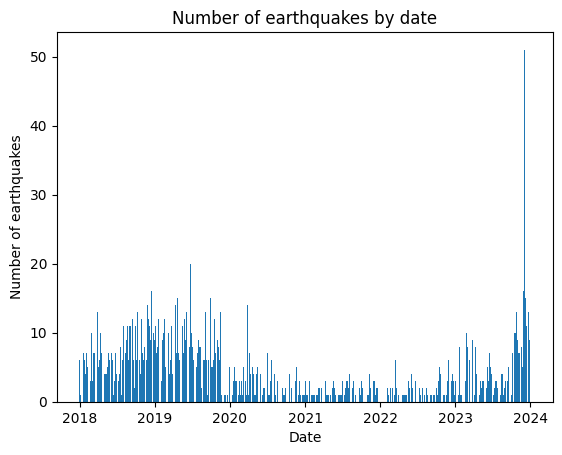

In [17]:
# Showing the number of earthquakes that occured
plt.clf()
plt.bar(earthquakes_data_grouped_date['Date'], earthquakes_data_grouped_date['count'])
plt.xlabel("Date")
plt.ylabel("Number of earthquakes")
plt.title("Number of earthquakes by date")
plt.show()